In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.style.use('seaborn-colorblind')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from acquire import get_iris_data
from prepare import prep_iris

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = get_iris_data()
train, test = prep_iris(df)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,embark_town_setosa,embark_town_versicolor,embark_town_virginica
130,7.4,2.8,6.1,1.9,0.0,0.0,1.0
119,6.0,2.2,5.0,1.5,0.0,0.0,1.0
29,4.7,3.2,1.6,0.2,1.0,0.0,0.0
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
62,6.0,2.2,4.0,1.0,0.0,1.0,0.0


In [9]:
# df_melt = pd.melt(train, "species", var_name="measurement")

In [10]:

# plt.title("Iris measurements by species")
# sns.swarmplot(x="measurement", y="value", data=df_melt, hue="species")

# plt.show()


In [11]:

# Looks like we'll have to calculate sepal area to see if it's insightful
train["sepal_area"] = train.sepal_length * train.sepal_width
train["petal_area"] = train.petal_length * train.petal_width

ValueError: Could not interpret input 'species'

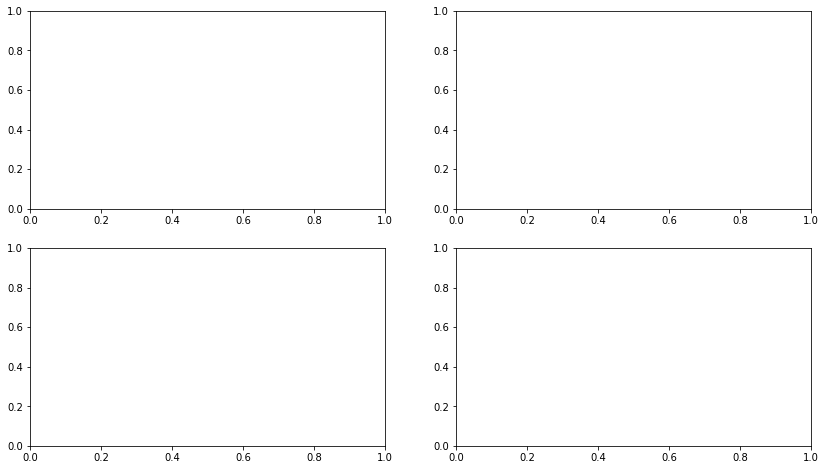

In [12]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.style.use('seaborn-colorblind')

# First subplot
plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Second subplot
plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species", palette=["r", "b", "y"])
plt.legend(loc='lower right')

# Third subplot
plt.subplot(2, 2, 3)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, hue="species", palette=["r", "b", "y"], legend=False)

# Forth subplot
plt.subplot(2, 2, 4)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species", palette=["r", "b", "y"], legend=False)

plt.show()

KeyError: "['species'] not found in axis"

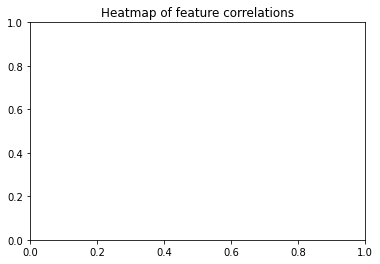

In [13]:

plt.title("Heatmap of feature correlations")
sns.heatmap(train.drop(columns="species").corr(), annot=True, cmap="Blues")
plt.show()

In [14]:
sns.pairplot(train, hue="species", corner=True)
plt.show()

TypeError: pairplot() got an unexpected keyword argument 'corner'

In [15]:
# # We'll need to decode the species name
train["species_name"] = encoder.inverse_transform(train.species)
train.head()

NameError: name 'encoder' is not defined

In [16]:

virginica = train[train.species_name == "virginica"]
versicolor = train[train.species_name == "versicolor"]

t, p = scipy.stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

# Let's go with an alpha of .01 for a 99% confidence level
alpha = .01

if p < alpha:
    print("We reject the null hypothesis that there is no significant difference between sepal length between virginica and versicolor species.")

AttributeError: 'DataFrame' object has no attribute 'species_name'